# Shapely

In [2]:
from shapely.geometry import Point,LineString,Polygon

In [3]:
point1 = Point(2.2, 4.2)

In [4]:
point2 = Point(7.2, -25.1)

In [5]:
point3 = Point(9.26, -2.456)

In [6]:
point3D = Point(9.26, -2.456, 0.57)

In [7]:
point_type = type(point1)

In [8]:
point_type

shapely.geometry.point.Point

In [9]:
type(point1)

shapely.geometry.point.Point

In [10]:
type(point3D)

shapely.geometry.point.Point

In [12]:
print point1

POINT (2.2 4.2)


In [13]:
point_coord = point1.coords

In [14]:
point_coord

In [15]:
xy = point1.xy

In [16]:
xy

(array('d', [2.2]), array('d', [4.2]))

In [17]:
print(xy)

(array('d', [2.2]), array('d', [4.2]))


In [18]:
print xy

(array('d', [2.2]), array('d', [4.2]))


In [19]:
x = point1.x

In [20]:
x


2.2

In [21]:
y = point1.y

In [22]:
y

4.2

In [23]:
type(y)

float

In [24]:
type(xy)

tuple

In [25]:
point_dist = point1.distance(point2)

In [35]:
print "Distance b/w points is {0:.2f} decimal degrees".format(point_dist)

Distance b/w points is 29.72 decimal degrees


In [36]:
line = LineString([point1,point2,point3])

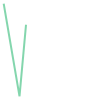

In [37]:
line

In [38]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [43]:
type(line)

shapely.geometry.linestring.LineString

In [44]:
lxy = line.xy

In [45]:
lxy

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))

In [46]:
zip(lxy[0],lxy[1])

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

In [47]:
line.length

52.46106912939557

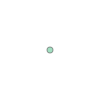

In [48]:
line.centroid

In [49]:
print line.centroid


POINT (6.229961354035622 -11.89241115757239)


In [50]:
type(line.centroid)

shapely.geometry.point.Point

In [58]:
poly = Polygon(((1,2),(2,3),(1,3)))

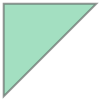

In [59]:
poly

In [60]:
print poly

POLYGON ((1 2, 2 3, 1 3, 1 2))


In [64]:
poly2 = Polygon([(p.x,p.y) for p in [point1, point2, point3]])

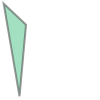

In [65]:
poly2

In [66]:
print poly2

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


In [67]:
poly.geom_type

'Polygon'

In [68]:
type(poly)

shapely.geometry.polygon.Polygon

Polygon with a hole inside

In [69]:
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

In [71]:
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

In [72]:
world = Polygon(shell=world_exterior)

In [73]:
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

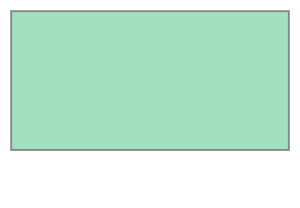

In [74]:
world

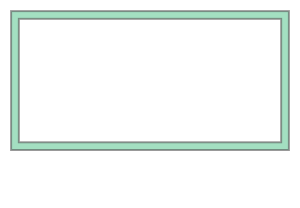

In [75]:
world_has_a_hole


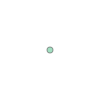

In [76]:
world.centroid

In [77]:
print(world.centroid)

POINT (-0 -0)


In [78]:
world.area

64800.0

In [79]:
world.bounds


(-180.0, -90.0, 180.0, 90.0)

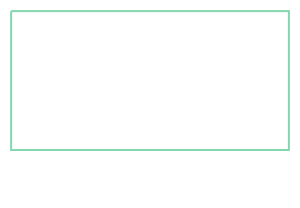

In [80]:
world.exterior

In [81]:
type(world.exterior)

shapely.geometry.polygon.LinearRing

In [82]:
world.exterior.length

1080.0

Geometry collections

In [83]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

In [84]:
multi_point = MultiPoint([point1, point2, point3])

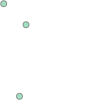

In [85]:
multi_point

In [86]:
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

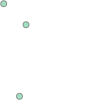

In [87]:
multi_point2

In [88]:
line1 = LineString([point1, point2])

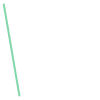

In [89]:
line1

In [90]:
line2 = LineString([point2, point3])

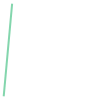

In [91]:
line2

In [92]:
multi_line = MultiLineString([line1, line2])

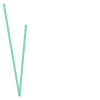

In [93]:
multi_line

In [94]:
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

In [95]:
west_exterior

[(-180, 90), (-180, -90), (0, -90), (0, 90)]

In [96]:
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

In [97]:
west_poly = Polygon(shell=west_exterior, holes=west_hole)

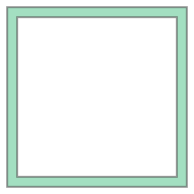

In [98]:
west_poly

In [99]:
min_x, min_y = 0, -90

In [100]:
max_x, max_y = 180, 90

In [101]:
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

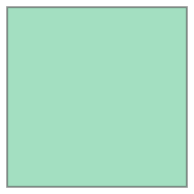

In [102]:
east_poly_box

In [103]:
multi_poly = MultiPolygon([west_poly, east_poly_box])

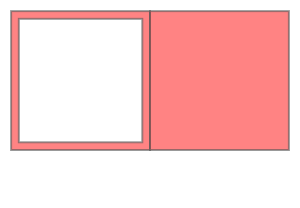

In [104]:
multi_poly

In [105]:
lines_count = len(multi_line)

In [106]:
lines_count

2

In [107]:
multi_poly_area = multi_poly.area


In [108]:
multi_poly_area

39200.0

In [109]:
west_area = multi_poly[0].area

In [110]:
west_area

6800.0

In [111]:
valid = multi_poly.is_valid

In [112]:
valid

False

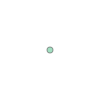

In [114]:
multi_poly.centroid

In [115]:
print multi_poly.centroid

POINT (58.77551020408163 -0)


Point in Polygon & Intersect

In [116]:
p1 = Point(24.952242, 60.1696017)

In [117]:
p2 = Point(24.976567, 60.1612500)

In [118]:
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

In [119]:
poly = Polygon(coords)

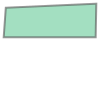

In [121]:
poly

In [122]:
p1.within(poly)

True

In [123]:
p2.within(poly)

False

In [124]:
print(p1)

POINT (24.952242 60.1696017)


In [125]:
print(poly.centroid)

POINT (24.95224242849236 60.16960179038188)


In [126]:
poly.contains(p1)

True

In [127]:
poly.contains(p2)

False

Intersect

In [128]:
line_a = LineString([(0, 0), (1, 1)])

In [129]:
line_b = LineString([(1, 1), (0, 2)])

In [130]:
line_a.intersects(line_b)

True

In [131]:
line_a.touches(line_b)

True

In [132]:
multi_poly = MultiLineString([line_a,line_b])

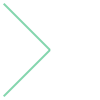

In [133]:
multi_poly

In [134]:
line_a.touches(line_a)

False

In [135]:
line_a.intersects(line_a)

True